In [1]:

import pandas as pd
artists_data = pd.read_csv('/Users/roshanrayudu/Desktop/NLP_sem4/project/data/d2/artists-data.csv')
lyrics_data = pd.read_csv('/Users/roshanrayudu/Desktop/NLP_sem4/project/data/d2/lyrics-data.csv')
# Merge the data frames on the 'Link' and 'ALink' columns
data = pd.merge(artists_data, lyrics_data, left_on='Link', right_on='ALink', how='inner')

In [2]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
import nltk
import string


def is_english(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False
    
def clean_text(text):
    # Clean text data in lyrics column
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)
    return cleaned_text


relevant_columns = ['Artist','Genres', 'Lyric', 'SName', 'language']

    # Create a new DataFrame with only relevant columns
data = data[relevant_columns]

    # Filter DataFrame for English songs
data = data[data['language'] == 'en']

    # Remove rows with missing values in 'genre' and 'lyrics' columns
data.dropna(subset=['Genres', 'Lyric'], inplace=True)

    # Remove duplicates
data.drop_duplicates(inplace=True)


print("Number of English songs:", len(data))
    
    # Apply text cleaning with lemmatization to the 'lyrics' column
data['cleaned_lyrics'] = data['Lyric'].apply(clean_text)
    
print("Text Cleaning is done")
    

Number of English songs: 191376
Text Cleaning is done


In [3]:
data.head(5)

,Artist,Genres,Lyric,SName,language,cleaned_lyrics
69,Ivete Sangalo,Pop; Axé; Romântico,I feel so unsure\nAs I take your hand and lead...,Careless Whisper,en,feel unsure take hand lead dance floor music d...
86,Ivete Sangalo,Pop; Axé; Romântico,"Don't let them fool, ya\nOr even try to school...",Could You Be Loved / Citação Musical do Rap: S...,en,dont let fool ya even try school ya oh weve go...
88,Ivete Sangalo,Pop; Axé; Romântico,"Baby, let's cruise, away from here\nDon't be c...",Cruisin' (Part. Saulo),en,baby let cruise away dont confused way clear w...
111,Ivete Sangalo,Pop; Axé; Romântico,"Know it sounds funny\nBut, I just can't stand ...",Easy,en,know sound funny cant stand pain girl im leavi...
140,Ivete Sangalo,Pop; Axé; Romântico,You've got that look again\nThe one I hoped I ...,For Your Babies (The Voice cover),en,youve got look one hoped lad face beaming smil...


In [4]:
df = data[data['Genres'].str.contains('rock|pop|hip-hop', case=False, na=False)]
for index, row in df.iterrows():
    genres = row['Genres'].split(';')
    new_genres = [genre for genre in genres if genre.lower() in ['rock', 'pop', 'hip hop']]
    if new_genres:
        df.at[index, 'Genres'] = new_genres  # Retain the first valid genre
    else:
        df.at[index, 'Genres'] = None

# Drop rows with NaN values in the 'Genres' column
df.dropna(subset=['Genres'], inplace=True)

# Rename the 'Genres' column to 'target'
df.rename(columns={'Genres': 'target'}, inplace=True)

print("Number of English songs:", len(df))
unique_values_counts = df['target'].value_counts()

print("Unique values in 'target' column:")
print(unique_values_counts)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# Use MultiLabelBinarizer for encoding
mlb = MultiLabelBinarizer()
encoded_targets = mlb.fit_transform(df['target'])

# Create a DataFrame from the encoded targets
encoded_df = pd.DataFrame(encoded_targets, columns=mlb.classes_)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
print(mlb.classes_)
print("\nNumber of English songs:", len(df))


Number of English songs: 39756
Unique values in 'target' column:
target
[Rock]       25177
[Pop]        13759
[Hip Hop]      820
Name: count, dtype: int64
['Hip Hop' 'Pop' 'Rock']

Number of English songs: 39756


/var/folders/r9/yhb05gs97cbbqbh5qgfjtwrm0000gn/T/ipykernel_24684/3156182501.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Genres'], inplace=True)
/var/folders/r9/yhb05gs97cbbqbh5qgfjtwrm0000gn/T/ipykernel_24684/3156182501.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Genres': 'target'}, inplace=True)


In [5]:
df.head()

,Artist,target,Lyric,SName,language,cleaned_lyrics,Hip Hop,Pop,Rock
0,Ivete Sangalo,[Pop],I feel so unsure\nAs I take your hand and lead...,Careless Whisper,en,feel unsure take hand lead dance floor music d...,0,1,0
1,Ivete Sangalo,[Pop],"Don't let them fool, ya\nOr even try to school...",Could You Be Loved / Citação Musical do Rap: S...,en,dont let fool ya even try school ya oh weve go...,0,1,0
2,Ivete Sangalo,[Pop],"Baby, let's cruise, away from here\nDon't be c...",Cruisin' (Part. Saulo),en,baby let cruise away dont confused way clear w...,0,1,0
3,Ivete Sangalo,[Pop],"Know it sounds funny\nBut, I just can't stand ...",Easy,en,know sound funny cant stand pain girl im leavi...,0,1,0
4,Ivete Sangalo,[Pop],You've got that look again\nThe one I hoped I ...,For Your Babies (The Voice cover),en,youve got look one hoped lad face beaming smil...,0,1,0


In [6]:
df.to_csv('/Users/roshanrayudu/Desktop/NLP_sem4/project/data/d2/data1.csv', index=False) 

In [7]:
import numpy as np

def load_glove_embeddings(embedding_path):
    """
    Load GloVe embeddings from a file.

    Args:
    - embedding_path (str): Path to the GloVe embedding file.

    Returns:
    - word_embeddings (dict): Dictionary mapping words to their GloVe vectors.
    """
    word_embeddings = {}
    with open(embedding_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            word_embeddings[word] = vector
    return word_embeddings

# Load GloVe embeddings
embedding_path = '/Users/roshanrayudu/Desktop/NLP_sem4/emb/glove/vectors.txt'
word_embeddings = load_glove_embeddings(embedding_path)

# Function to get embedding for each word
def get_word_embedding(word):
    return word_embeddings.get(word, np.zeros_like(next(iter(word_embeddings.values()))))  # Use the size of any vector from word_embeddings

# Function to get average embedding for a lyric
def get_lyric_embedding(lyric):
    words = lyric.split()  # Tokenize lyric into words
    embeddings = [get_word_embedding(word) for word in words]  # Get embeddings for each word
    if embeddings:
        return np.mean(embeddings, axis=0)  # Return average embedding of all words
    else:
        return np.zeros_like(next(iter(word_embeddings.values())))  # Return zero vector if lyric is empty

# Apply get_lyric_embedding function to each row in the DataFrame
df['lyric_embedding'] = df['cleaned_lyrics'].apply(get_lyric_embedding)


In [8]:
df.head()

,Artist,target,Lyric,SName,language,cleaned_lyrics,Hip Hop,Pop,Rock,lyric_embedding
0,Ivete Sangalo,[Pop],I feel so unsure\nAs I take your hand and lead...,Careless Whisper,en,feel unsure take hand lead dance floor music d...,0,1,0,"[0.045407925, 0.20010377, 1.1677836, -0.130222..."
1,Ivete Sangalo,[Pop],"Don't let them fool, ya\nOr even try to school...",Could You Be Loved / Citação Musical do Rap: S...,en,dont let fool ya even try school ya oh weve go...,0,1,0,"[-0.1323289, 0.22624084, 0.919709, -0.1148357,..."
2,Ivete Sangalo,[Pop],"Baby, let's cruise, away from here\nDon't be c...",Cruisin' (Part. Saulo),en,baby let cruise away dont confused way clear w...,0,1,0,"[-0.028755477, 0.3713202, 1.109544, -0.1620172..."
3,Ivete Sangalo,[Pop],"Know it sounds funny\nBut, I just can't stand ...",Easy,en,know sound funny cant stand pain girl im leavi...,0,1,0,"[0.03278552, 0.37988737, 1.0978612, -0.1396328..."
4,Ivete Sangalo,[Pop],You've got that look again\nThe one I hoped I ...,For Your Babies (The Voice cover),en,youve got look one hoped lad face beaming smil...,0,1,0,"[-0.0077235615, 0.29734513, 1.1451551, -0.0201..."


In [9]:
df.to_csv('/Users/roshanrayudu/Desktop/NLP_sem4/project/data/d2/fdata1.csv', index=False) 

In [10]:
df.columns

Index(['Artist', 'target', 'Lyric', 'SName', 'language', 'cleaned_lyrics',
       'Hip Hop', 'Pop', 'Rock', 'lyric_embedding'],
      dtype='object')

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def save_word_clouds(data):
    # Convert 'target' column to strings
    data['target'] = data['target'].astype(str)
    
    # Step 1: Group the DataFrame by 'target'
    grouped_data = data.groupby('target')

    # Step 2: Generate word cloud for each unique value in the 'target' column
    for genre, group in grouped_data:
        # Step 2a: Concatenate cleaned lyrics for the genre into a single string
        text = ' '.join(group['cleaned_lyrics'])

        # Step 2b: Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Step 2c: Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Genre: {genre}')
        plt.axis('off')
        
        # Step 2d: Save the word cloud as an image
        filename = f"wordcloud_{genre}.png"
        plt.savefig(filename)
        print(f"Word cloud for genre '{genre}' saved as '{filename}'")
        plt.close()

# Call the function with your DataFrame
save_word_clouds(df)



Word cloud for genre '['Hip Hop']' saved as 'wordcloud_['Hip Hop'].png'
Word cloud for genre '['Pop']' saved as 'wordcloud_['Pop'].png'
Word cloud for genre '['Rock']' saved as 'wordcloud_['Rock'].png'


In [12]:
# Assuming df is your original DataFrame
selected_columns = ['lyric_embedding', 'Hip Hop', 'Pop', 'Rock']
preprocessed_data = df[selected_columns].copy()


In [13]:
preprocessed_data.columns

Index(['lyric_embedding', 'Hip Hop', 'Pop', 'Rock'], dtype='object')

In [14]:
# Extract 'lyric_embedding' as X and 'Hip Hop', 'Pop', 'Rock' as Y
X = preprocessed_data['lyric_embedding'].values.tolist()
Y = preprocessed_data[['Hip Hop', 'Pop', 'Rock']].values.tolist()

# Rename columns
X_column_name = 'lyric_embedding'
Y_column_name = 'y'

# Convert X and Y to numpy arrays
X = np.array(X)
Y = np.array(Y)


# Print the shape of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (39756, 50)
Shape of Y: (39756, 3)


In [15]:
print(X)

[[ 0.04540792  0.20010377  1.1677836  ... -2.1938174  -0.1002815
  -0.11835608]
 [-0.1323289   0.22624084  0.919709   ... -1.6561728  -0.18368644
   0.03710866]
 [-0.02875548  0.3713202   1.109544   ... -2.2281568  -0.30047596
  -0.20880234]
 ...
 [-0.02538223  0.3139085   1.288367   ... -2.2380817  -0.26018208
  -0.1625912 ]
 [-0.12354131  0.27176818  0.7694409  ... -1.7968111  -0.22758505
  -0.49124026]
 [-0.07235441  0.15191874  1.3015751  ... -1.7371085  -0.09479728
  -0.04548743]]


In [16]:
# Split the data into training (80%) and test (10%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)

# Split the temporary data into test (50%) and evaluation (50%) sets
X_test, X_eval, Y_test, Y_eval = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [17]:
print(Y_train)

[[0 0 1]
 [0 1 0]
 [0 0 1]
 ...
 [0 0 1]
 [1 0 0]
 [1 0 0]]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

Y_train_labels = np.argmax(Y_train, axis=1)
Y_val_labels = np.argmax(Y_eval, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)


print(Y_train_labels)



[2 1 2 ... 2 0 0]


In [19]:
# Initialize the logistic regression model with multinomial strategy
model = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Train the model on the training data
model.fit(X_train, Y_train_labels)

# Predict on the validation set
Y_val_pred = model.predict(X_eval)

# Calculate accuracy and F1 score on the validation set
accuracy = accuracy_score(Y_val_labels, Y_val_pred)
f1 = f1_score(Y_val_labels, Y_val_pred, average='weighted')

print("Validation Accuracy:", accuracy)
print("Validation F1 Score:", f1)

Validation Accuracy: 0.710261569416499
Validation F1 Score: 0.6919181702685349


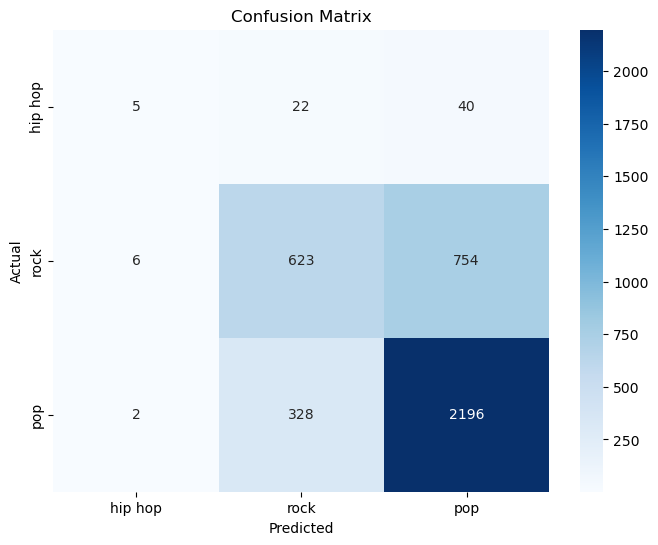

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

conf_mat = confusion_matrix(Y_val_labels, Y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['hip hop', 'rock', 'pop'], yticklabels=['hip hop', 'rock', 'pop'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# class imbalance
preprocessed_data.columns

Index(['lyric_embedding', 'Hip Hop', 'Pop', 'Rock'], dtype='object')

In [22]:
preprocessed_data['genre_number'] = np.argmax(preprocessed_data[['Hip Hop', 'Pop', 'Rock']].values, axis=1)

In [23]:
preprocessed_data.head()

,lyric_embedding,Hip Hop,Pop,Rock,genre_number
0,"[0.045407925, 0.20010377, 1.1677836, -0.130222...",0,1,0,1
1,"[-0.1323289, 0.22624084, 0.919709, -0.1148357,...",0,1,0,1
2,"[-0.028755477, 0.3713202, 1.109544, -0.1620172...",0,1,0,1
3,"[0.03278552, 0.37988737, 1.0978612, -0.1396328...",0,1,0,1
4,"[-0.0077235615, 0.29734513, 1.1451551, -0.0201...",0,1,0,1


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Assuming preprocessed_data is your dataframe containing the data

# Convert genre labels to numerical representations
label_encoder = LabelEncoder()
preprocessed_data['genre_number'] = label_encoder.fit_transform(preprocessed_data['genre_number'])

# Separate features (X) and target (Y)
X = preprocessed_data['lyric_embedding'].values.tolist()
Y = preprocessed_data['genre_number'].values.tolist()

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Convert the resampled data back to a dataframe
resampled_df = pd.DataFrame()
resampled_df['lyric_embedding'] = X_resampled
resampled_df['genre_number'] = Y_resampled

# Check the new class distribution
print(resampled_df['genre_number'].value_counts())
print(resampled_df.head())

# Now you can use resampled_df for training your model


genre_number
1    25177
0    25177
2    25177
Name: count, dtype: int64
                                     lyric_embedding  genre_number
0  [0.04540792480111122, 0.2001037746667862, 1.16...             1
1  [-0.13232889771461487, 0.2262408435344696, 0.9...             1
2  [-0.02875547669827938, 0.3713201880455017, 1.1...             1
3  [0.03278551995754242, 0.3798873722553253, 1.09...             1
4  [-0.007723561488091946, 0.2973451316356659, 1....             1


In [25]:
resampled_df['Hip Hop'] = (resampled_df['genre_number'] == 0).astype(int)
resampled_df['Pop'] = (resampled_df['genre_number'] == 1).astype(int)
resampled_df['Rock'] = (resampled_df['genre_number'] == 2).astype(int)
resampled_df.head()

,lyric_embedding,genre_number,Hip Hop,Pop,Rock
0,"[0.04540792480111122, 0.2001037746667862, 1.16...",1,0,1,0
1,"[-0.13232889771461487, 0.2262408435344696, 0.9...",1,0,1,0
2,"[-0.02875547669827938, 0.3713201880455017, 1.1...",1,0,1,0
3,"[0.03278551995754242, 0.3798873722553253, 1.09...",1,0,1,0
4,"[-0.007723561488091946, 0.2973451316356659, 1....",1,0,1,0


In [26]:
# Extract 'lyric_embedding' as X and 'Hip Hop', 'Pop', 'Rock' as Y
X = resampled_df['lyric_embedding'].values.tolist()
Y = resampled_df['genre_number'].values.tolist()


# Convert X and Y to numpy arrays
X = np.array(X)
Y = np.array(Y)


# Print the shape of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Split the data into training (80%) and test (10%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)

# Split the temporary data into test (50%) and evaluation (50%) sets
X_test, X_eval, Y_test, Y_eval = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)



Shape of X: (75531, 50)
Shape of Y: (75531,)


In [27]:
model = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Train the model on the training data
model.fit(X_train, Y_train)

# Predict on the validation set
Y_val_pred = model.predict(X_eval)

# Calculate accuracy and F1 score on the validation set
accuracy = accuracy_score(Y_eval, Y_val_pred)
f1 = f1_score(Y_eval, Y_val_pred, average='weighted')

print("Validation Accuracy:", accuracy)
print("Validation F1 Score:", f1)

Validation Accuracy: 0.6327773365104581
Validation F1 Score: 0.6325427042929852


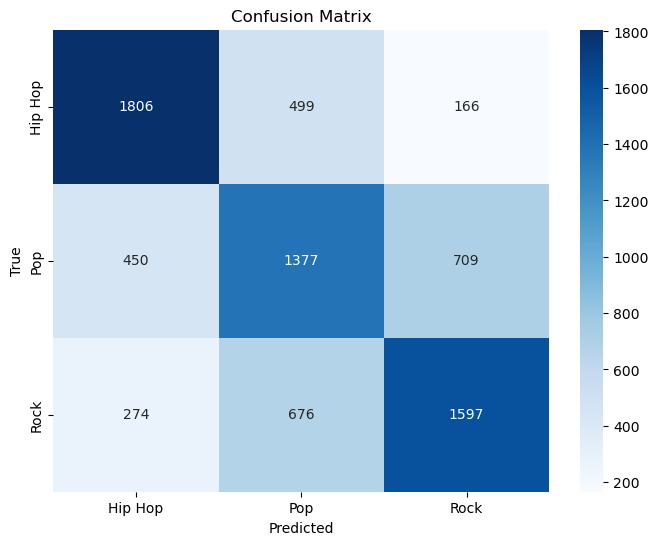

In [28]:


# Compute confusion matrix
cm = confusion_matrix(Y_eval, Y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hip Hop', 'Pop', 'Rock'], yticklabels=['Hip Hop', 'Pop', 'Rock'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


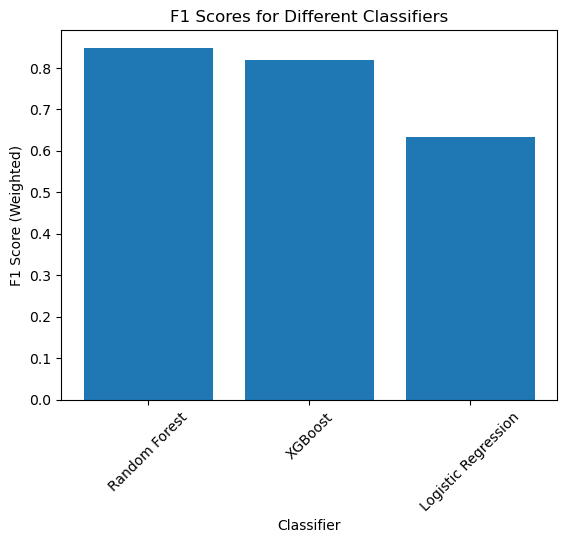

F1 Scores:
Random Forest: 0.85
XGBoost: 0.82
Logistic Regression: 0.63
The best classifier is: Random Forest


In [29]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train and evaluate each classifier
f1_scores = {}
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_eval)
    f1 = f1_score(Y_eval, Y_pred, average='weighted')
    f1_scores[name] = f1

# Plot F1 scores
plt.bar(f1_scores.keys(), f1_scores.values())
plt.xlabel('Classifier')
plt.ylabel('F1 Score (Weighted)')
plt.title('F1 Scores for Different Classifiers')
plt.xticks(rotation=45)
plt.show()

# Print F1 scores
print("F1 Scores:")
for name, f1 in f1_scores.items():
    print(f"{name}: {f1:.2f}")

# Identify the best classifier
best_classifier = max(f1_scores, key=f1_scores.get)
print(f"The best classifier is: {best_classifier}")


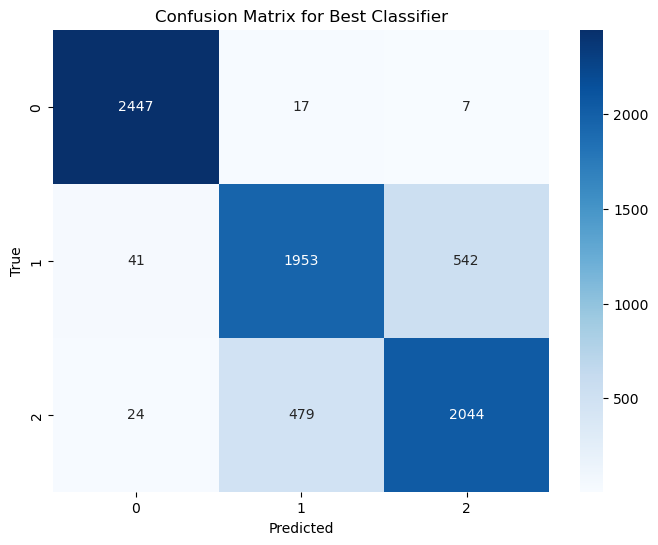

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib
# Train the best classifier
best_clf = classifiers[best_classifier]
best_clf.fit(X_train, Y_train)

joblib.dump(best_clf, '/Users/roshanrayudu/Desktop/NLP_sem4/MusicClassficationNLP/best_model.pkl')

# Make predictions on the evaluation dataset
Y_pred = best_clf.predict(X_eval)

# Generate confusion matrix
cm = confusion_matrix(Y_eval, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best Classifier')
plt.show()


In [31]:
resampled_df.columns

Index(['lyric_embedding', 'genre_number', 'Hip Hop', 'Pop', 'Rock'], dtype='object')

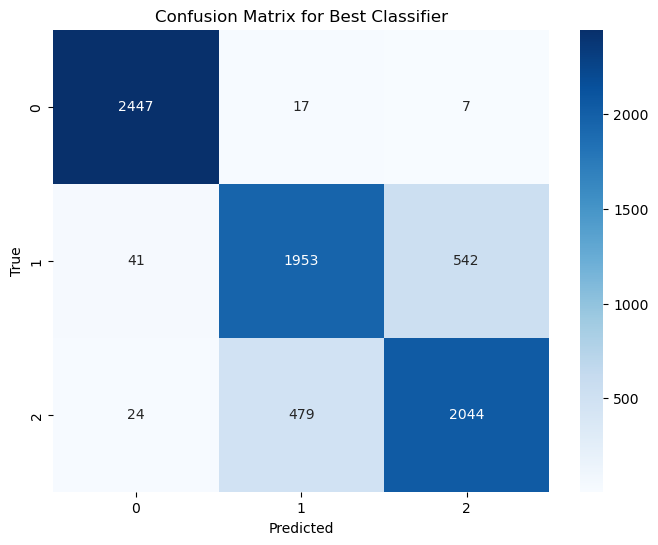

In [32]:
import joblib

# Load the saved model from file
loaded_model = joblib.load('/Users/roshanrayudu/Desktop/NLP_sem4/MusicClassficationNLP/best_model.pkl')

# Make predictions on new data
Y_pred1 = loaded_model.predict(X_eval)

# Generate confusion matrix
cm1 = confusion_matrix(Y_eval, Y_pred1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='g', xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best Classifier')
plt.show()


In [33]:
# Initialize an empty set to store unique entries
unique_entries = set()

# Open the text file
with open('/Users/roshanrayudu/Desktop/NLP_sem4/gloveEmbeddings/vocab.txt', 'r') as file:
    # Read all lines from the file
    lines = file.readlines()
    # Iterate through each line
    for line in lines:
        # Split the line by space and take the first part
        entry = line.strip().split()[0]
        # Add the entry to the set
        unique_entries.add(entry)

# Count the number of unique entries
num_unique_entries = len(unique_entries)

# Print the number of unique entries
print("Number of unique entries in the text file:", num_unique_entries)

vocab_size = num_unique_entries


Number of unique entries in the text file: 61565


In [5]:
!python --version

Python 3.11.5


In [8]:
import tensorflow as tf
from tf.keras.models import Sequential
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Embedding, LSTM, Dense
#from tensorflow.keras.optimizers import Adam
#from sklearn.model_selection import train_test_split
model = Sequential([
        tf.keras.Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length),
        LSTM(units=128),  
        Dense(3, activation='softmax')  
    ])
# Step 1: Define the LSTM model architecture
def create_lstm_model(input_dim, output_dim, input_length):
    model = tf.keras.Sequential([
        tf.keras.Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length),
        LSTM(units=128),  
        Dense(3, activation='softmax')  
    ])
    return model

# Step 2: Create and compile the LSTM model
input_dim = 61565  # Size of the vocabulary
output_dim = 50  # Size of the embedding vectors
input_length = 50  # Length of each input sequence
adam_optimizer = Adam(learning_rate=0.001)
lstm_model = create_lstm_model(input_dim, output_dim, input_length)
lstm_model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])


ModuleNotFoundError: No module named 'tf'

In [35]:

# Step 3: Prepare the input features and target variable
X = np.array(resampled_df['lyric_embedding'].tolist())  # Assuming 'lyric_embedding' contains the embeddings
Y = np.array(resampled_df[['Hip Hop', 'Pop', 'Rock']])  # One-hot encoded genre labels

# Step 4: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(Y_train.shape)


(60424, 50)
(60424, 3)


In [40]:

# Step 5: Train the LSTM model
history = lstm_model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

# Step 6: Evaluate the model on the testing data
loss, accuracy = lstm_model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'lstm_model' is not defined

In [39]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Step 1: Define the LSTM model architecture
def create_lstm_model(input_dim, output_dim, input_length, learning_rate=0.001, units=128, dropout_rate=0.0):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length),
        LSTM(units=units, dropout=dropout_rate),
        Dense(3, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the parameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'units': [64, 128, 256],
    'dropout_rate': [0.0, 0.1, 0.2],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 150]  
}

# Step 2: Create a KerasClassifier wrapper for the TensorFlow model
keras_model = KerasClassifier(build_fn=create_lstm_model, verbose=0)

# Step 3: Perform grid search
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, Y_train)

# Step 4: Print the best parameters and score
print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

# Step 5: Evaluate the best model on the test set
best_model = grid_result.best_estimator_
loss, accuracy = best_model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
from transformers import pipeline, RobertaTokenizer
from transformers import RobertaTokenizer, RobertaModel

In [ ]:
def getTopSentiments(text):
    """
    Get top sentiments from the text using RoBERTa-based sentiment classifier.
    """
    tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base')
    classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=3)
    
    while len(tokenizer.tokenize(text)) > 510:
        text = text[:len(text) - 10]
    sentiments_list = classifier(text)[0]
    x = sentiments_list[0]['label']
    if sentiments_list[1]['score'] > 0.2:
        x = x + "," + sentiments_list[1]['label']
    if sentiments_list[2]['score'] > 0.2:
        x = x + "," + sentiments_list[2]['label']
    return x

In [ ]:
getTopSentiments("world peace")

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/Users/roshanrayudu/Desktop/NLP_sem4/MusicClassficationNLP/data_with_sentiments.csv")

# Assuming you have the predicted genre column named 'predicted_genre'
def assign_genre(row):
    if row["Hip Hop"] == 1:
        return "Hip Hop"
    elif row["Pop"] == 1:
        return "Pop"
    elif row["Rock"] == 1:
        return "Rock"
    else:
        return -1  # Or any default value if none of the columns are set to 1

# Apply the function to create the new 'Genre' column
df['Genre'] = df.apply(assign_genre, axis=1)

# Save the DataFrame back to a new CSV file
df.to_csv("/Users/roshanrayudu/Desktop/NLP_sem4/MusicClassficationNLP/data_with_sentiments1.csv", index=False)


In [42]:
resampled_df.to_csv("/Users/roshanrayudu/Desktop/NLP_sem4/MusicClassficationNLP/resampled.csv", index=False)